In [74]:
from openTSNE import TSNE
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [75]:
def plot(
    x,
    y,
    ax=None,
    title=None,
    draw_legend=True,
    draw_centers=False,
    draw_cluster_labels=False,
    colors=None,
    legend_kwargs=None,
    label_order=None,
    **kwargs
):
    import matplotlib

    if ax is None:
        _, ax = matplotlib.pyplot.subplots(figsize=(8, 8))

    if title is not None:
        ax.set_title(title)

    plot_params = {"alpha": kwargs.get("alpha", 0.6), "s": kwargs.get("s", 1)}

    # Create main plot
    if label_order is not None:
        assert all(np.isin(np.unique(y), label_order))
        classes = [l for l in label_order if l in np.unique(y)]
    else:
        classes = np.unique(y)
    if colors is None:
        default_colors = matplotlib.rcParams["axes.prop_cycle"]
        colors = {k: v["color"] for k, v in zip(classes, default_colors())}

    point_colors = list(map(colors.get, y))

    ax.scatter(x[:, 0], x[:, 1], c=point_colors, rasterized=True, **plot_params)

    # Plot mediods
    if draw_centers:
        centers = []
        for yi in classes:
            mask = yi == y
            centers.append(np.median(x[mask, :2], axis=0))
        centers = np.array(centers)

        center_colors = list(map(colors.get, classes))
        ax.scatter(
            centers[:, 0], centers[:, 1], c=center_colors, s=48, alpha=1, edgecolor="k"
        )

        # Draw mediod labels
        if draw_cluster_labels:
            for idx, label in enumerate(classes):
                ax.text(
                    centers[idx, 0],
                    centers[idx, 1] + 2.2,
                    label,
                    fontsize=kwargs.get("fontsize", 6),
                    horizontalalignment="center",
                )

    # Hide ticks and axis
    ax.set_xticks([]), ax.set_yticks([]), ax.axis("off")

    if draw_legend:
        legend_handles = [
            matplotlib.lines.Line2D(
                [],
                [],
                marker="s",
                color="w",
                markerfacecolor=colors[yi],
                ms=10,
                alpha=1,
                linewidth=0,
                label=yi,
                markeredgecolor="k",
            )
            for yi in classes
        ]
        legend_kwargs_ = dict(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, )
        if legend_kwargs is not None:
            legend_kwargs_.update(legend_kwargs)
        ax.legend(handles=legend_handles, **legend_kwargs_)

In [76]:
# import pickle

# with open("./t-sne-data/macosko_2015.pkl", "rb") as f:
#     data = pickle.load(f)

# x = data["pca_50"]
# y = data["CellType1"].astype(str)

In [77]:
x_list = torch.load('./result/Fluorescence/test_hidden_state.pt')
y_list = torch.load('./result/Fluorescence/test_labels_all.pt')

In [78]:
x_list_remove_duplicated = x_list[1:,:,:]

In [79]:
x_final = x_list_remove_duplicated.reshape(-1,640)

In [80]:
x_final.shape

torch.Size([27216, 640])

In [81]:
len(y_list)

27216

In [82]:
max(y_list)

array([4.105], dtype=float16)

In [83]:
min(y_list)

array([1.286], dtype=float16)

In [84]:
# y_list_one_zero = [0 if i<2.5 else 1 for i in y_list]

In [85]:
y_list_one_zero = y_list

In [86]:
x = np.array(x_final.cpu())
y = np.array(y_list_one_zero)

In [87]:
x.shape

(27216, 640)

PCA

In [88]:
x_std = StandardScaler().fit_transform(x)

In [89]:
x_std.shape

(27216, 640)

In [90]:
pca = PCA(n_components=50)
pca.fit(x_std.T)

PCA(n_components=50)

In [91]:
x_pca = pca.components_.T

In [92]:
len(x_pca)

27216

In [93]:
len(x_pca[0])

50

In [94]:
y.shape

(27216, 1)

In [95]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 27216 samples with 640 features


In [96]:
# x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=.33, random_state=42)

In [97]:
x_train,y_train = x_pca, y

In [98]:
print("%d training samples" % x_train.shape[0])
# print("%d test samples" % x_test.shape[0])

27216 training samples


In [99]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=44,
    verbose=True,
    n_iter=1000,
)

In [100]:
embedding_train = tsne.fit(x_pca)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_iter=1000, n_jobs=8, random_state=44,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...


   --> Time elapsed: 8.07 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.46 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=12.00, lr=2268.00 for 250 iterations...
Iteration   50, KL divergence 6.4099, 50 iterations in 2.1320 sec
Iteration  100, KL divergence 6.3600, 50 iterations in 2.3067 sec
Iteration  150, KL divergence 6.3658, 50 iterations in 2.0628 sec
Iteration  200, KL divergence 6.3654, 50 iterations in 2.0299 sec
Iteration  250, KL divergence 6.3650, 50 iterations in 2.3861 sec
   --> Time elapsed: 10.92 seconds
===> Running optimization with exaggeration=1.00, lr=27216.00 for 1000 iterations...
Iteration   50, KL divergence 4.2006, 50 iterations in 2.1391 sec
Iteration  100, KL divergence 4.0439, 50 iterations in 3.0003 sec
Iteration  150, KL divergence 3.9714, 50 iterations in 4.1231 sec
Iteration  200, KL divergence 3.9271, 50 iterations in 5.3820 sec
Iteration  250, KL 

In [101]:
embedding_train

TSNEEmbedding([[ 23.34667508,  66.66778147],
               [-17.30674644,  22.63678553],
               [  2.54608975,  31.07063692],
               ...,
               [-67.40751819,  30.03464216],
               [-18.3244881 ,  17.58523005],
               [-32.64978079,  19.32202479]])

In [102]:
len(embedding_train)

27216

In [103]:
len(y_train)

27216

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [105]:
colors = y_train

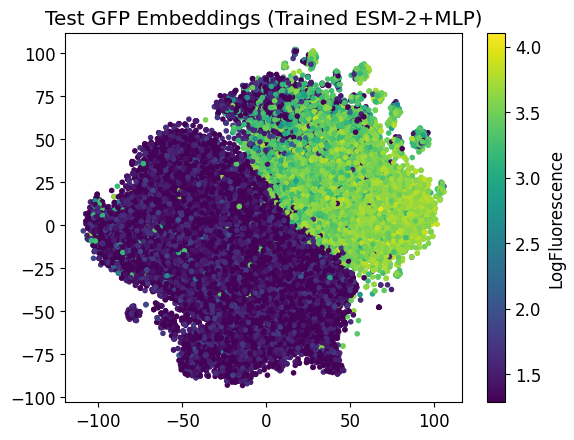

In [106]:
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.scatter(embedding_train[:, 0], embedding_train[:, 1],c=colors,alpha=1, cmap='viridis',vmin=min(y_train),vmax=max(y_train),marker='.')
plt.colorbar(label="LogFluorescence")
plt.title("Test GFP Embeddings (Trained ESM-2+MLP)")
plt.show()

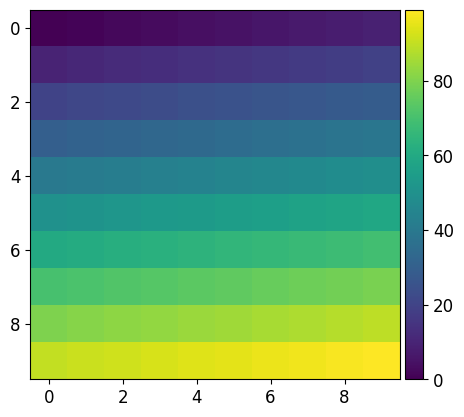

In [107]:
ax = plt.subplot()
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an Axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()